## How & Why NMR Works?

We know electrons have spin, but nuclei also have spin, a property which imparts a type of internal motion called spin angular momentum and an associated magnetic dipole to a nucleus. The magnetic dipole moment of a nucleus is $\sim1000$ times less than that of a paramagnetic atom due to unpaired electrons, but unlike electrons, the spin of nuclei are not restricted to $\frac{1}{2}$.

Nuclear paramagnetism is a property of all isotopes with a nuclear spin not equal to zero.  That is, all isotopes with an odd number of protons and/or neturons have a net nuclear magnetic moment, which makes these isotopes susceptible in the presence of an external or applied magnetic field. NMR spectroscopy exploits the bulk magnetic properties of paramagnetic nuclei using an applied magnetic field.

### The Hamiltonian & Quantized Energy Levels for a Proton in a Magnetic Field

The magnetic moment of a nucleus, $\mu$, is defined as

$$ \mu = g_N \frac {q}{2m_N} \hat{I}_z = g_N \beta_N \hat{I}_z = \gamma \hat{I}_z$$

in which $g_N$ is the g factor for a specific nucleus, $\beta_N$ is the nuclear magneton (also specific to a nucleus of a specified mass, $m_N$, and charge, q), $\gamma$ is the magnetogyric ratio, and $\hat{I}_z$ is a spin angular momentum operator.

Using this relation, the Hamiltonian for an isolated nucleus interacting with a magnetic field is:

$$\hat{H} = - \mu B_z = -\gamma B_z \hat{I}_z = -\gamma B_z m_I \hbar$$

Here, $B_z$ represents the magnetic field strength.

The solutions to the time-independent (or stationary state) Schrodinger equation with this Hamiltonian are 

$$E = -\hbar \gamma m_IB_z  \qquad m_I=I, I-1, ..., -I$$

For a spin $\frac{1}{2}$ system:

$$E = \pm\frac{\hbar \gamma B_z}{2} = \pm\frac{\hbar\omega_0}{2}$$

in which $\omega_0 \equiv \gamma B_z$ is the larmor procession frequency.  

We label the wavefunctions by the ket $|I,m_I\rangle$.

### Relative Energy Levels of Spin 1/2 Nuclei

Text(0,0.5,'Energy Separation for spin 1/2')

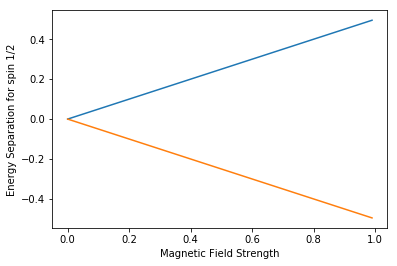

In [1]:
# Note that for a spin 1/2 nuclei (e.g. a proton), there are two energy levels.
# The magnitude of the energy difference between these two energy levels is
# proportional to the strength of the magnetic field.

# The lower energy level corresponds to the state in which the nucleus is aligned with the magnetic field.
# The higher energy levels describes the state in which the nucleus is not aligned with the field.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

B = np.arange(0,1,0.01)

plt.figure()
plt.plot(B,0.5*B)
plt.plot(B,-0.5*B)
plt.xlabel("Magnetic Field Strength")
plt.ylabel("Energy Separation for spin 1/2")


***Problem: Make a similar plot of energy vs magnetic field strength for a Boron-11 nucleus. What's the spin state of Boron-11? How many energy levels are expected?***

### Spin State Populations

The bulk magnetic moment of a sample can be expressed as

$$M = P[A]\mu V = \left(n_\uparrow - n_\downarrow\right)\mu$$

in which $\mu$ is the magnetic moment of each nucleus as defined above, $V$ is the volume , $[A] = C_\uparrow + C_\downarrow$ is the total concentration of nuclei, and $P[A] = C_\uparrow - C_\downarrow$ is the difference in concentration of spin-up and spin-down nuclear moments.

In a static magnetic field $\mathbf{B}_0$, the energy difference between aligned and anti-aligned  spin $1/2$ nuclei is

$$\Delta E = h\Delta \nu = 2\mu B_0$$

In a thermal system, the population of states $C_\uparrow$ and $C_\downarrow$ are proportional to a Boltzmann factor and the ratio of these populations is

$$\frac{C_\uparrow}{C_\downarrow} = e^{\frac{\Delta E}{kT}} = e^{\frac{2\mu B_0}{kT}}$$

Thus we get

$$P = \frac{C_\uparrow - C_\downarrow}{C_\uparrow + C_\downarrow} = \frac{e^{\frac{2\mu B_0}{kT}}-1}{e^{\frac{2\mu B_0}{kT}}+1} = \frac{e^{\frac{\mu B_0}{kT}}-e^{-\frac{\mu B_0}{kT}}}{e^{\frac{\mu B_0}{kT}}+e^{-\frac{\mu B_0}{kT}}}$$

$\frac{\mu B_0}{kT}$ is small for most magnetic fields and nuclei thus allowing us to approximate $e^{\pm\frac{\mu B_0}{kT}} \approx 1 \pm \frac{\mu B_0}{kT}$ yielding

$$P \approx \frac{\mu B_0}{kT}$$

For a typical magnetic field ($B_0 = 1.5$ T) and temperature ($T=310 $K), we get $P\approx 1.1\times10^{-5}$ is the fraction of spins aligned to the field. 

### The Basics of NMR Spectra

At $4.26$ kHz/G, a 1.41 T (or 14100 G) magnetic will have a hydrogen resonant frequency at 60 MHz.  Stronger magnets will lead to higher resonant frequencies.  In an NMR apparatus, the absorption of a transverse radio frequency magnetic field is measured.  Because of the relationship between transverse dipole moment frequencies and applied magnetic field, $\omega_0 = \gamma B_0$, it is equivalent to scan the applied field or the radio frequency to determine an absorption spectrum.  It is standard to fix the radio frequency and scan magnetic field strength. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax

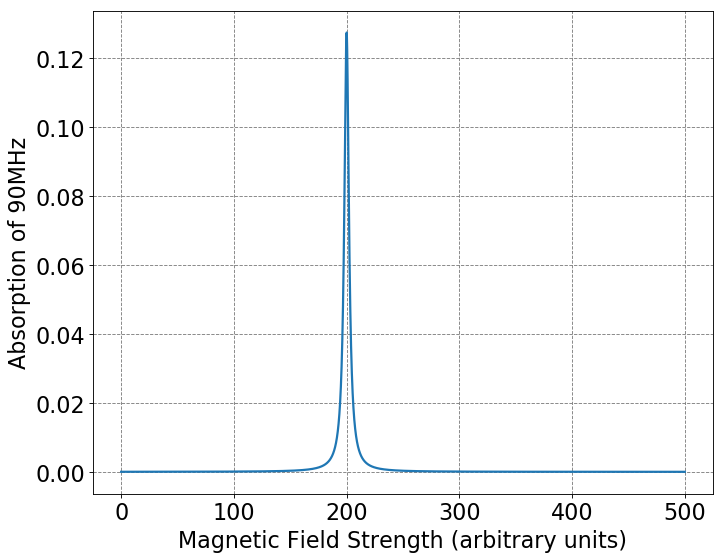

In [4]:
ax = define_figure(xlabel="Magnetic Field Strength (arbitrary units)",ylabel="Absorption of 90MHz")
def lorentzian(x,x0,fwhm):
    return (2*np.pi)**(-1) * fwhm / ( (x-x0)**2 + (0.5*fwhm)**2 )

x = np.arange(0,500,0.01)
fwhm = 5.0
x0 = 200.0

plt.plot(x,lorentzian(x,x0,fwhm),lw=2)

The above plot depicts what the absorption of a sample (with one chemically equivalent absorbing nucleus) might look like as a function of applied magnetic field strength.  This can be converted into aborption as a function of frequency which is the way it is typically plotted.

(500, 0)

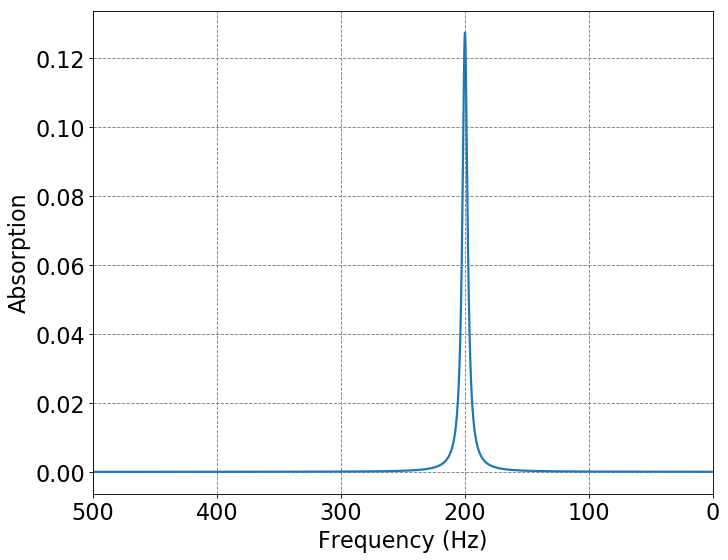

In [4]:
ax = define_figure(xlabel="Frequency (Hz)",ylabel="Absorption")
def lorentzian(x,x0,fwhm):
    return (2*np.pi)**(-1) * fwhm / ( (x-x0)**2 + (0.5*fwhm)**2 )

x = np.arange(0,500,0.01)
fwhm = 5.0
x0 = 200.0

plt.plot(x,lorentzian(x,x0,fwhm),lw=2)
plt.xlim(500,0)

The above plot shows the absorbance of a sample as a function of applied radio frequency.  This is a more typical arrangement of a NMR spectrum.  Though, typically, the independent variable is converted to chemical shift, $\delta_H$, which is independent of the NMR spectrometer used to generate spectra.

$$\delta_H = \frac{\text{resonance frequency of nucleus relative to TMS}}{\text{spectrometer frequency}}\times 10^6$$

$$ = \left( \frac{\nu_H - \nu_{TMS}}{\nu_{spectrometer}}\right)\times 10^6$$

### NMR Spectra: Shielding

So far, we have been assuming $B_z$ (or $B_0$), the magnetic field felt by a nucleus, is constant across the sample.  If this were the case, we would not be able to distinguish one hydrogen from another in the H1 NMR spectra of various organic molecules. In actuality, the value of $B_z$ that is felt by nuclei will depend on the environment of each nucleus, and  the motions of the electrons surrounding the nuclei are the reason for the environment-dependent magnetic fields in the presence of the applied magnetic field.  The environment-dependent field or electronic-response field, $B_{elec}$, is proportional to the applied field.

$$B_{elec} = -\sigma B_0$$

$\sigma$ is called the shielding constant (typical values of $\sim 10^{-5}$).  

The total field experienced by a nucleus is:

$$B_z = B_0 + B_{elec} = (1-\sigma)B_0$$

If we plug this into our equation for the transverse component of the spin magnetic moment we get

$$\omega_0 = \gamma (1-\sigma)B_0$$

or

$$B_0 = \frac{\omega_0}{\gamma(1-\sigma)}$$

which is the magnetic field strength at which a nucleus with shielding constant $\sigma$ will absorb the transverse RF magentic field.  

This leads to a resonant frequency of a hydrogen nucleus of

$$\nu_H = \frac{\gamma B_0}{2\pi}(1-\sigma_H)$$

Of course this is usually converted to a chemical shift, $\delta_H$, in the manner discussed above.  It should be noted that the difference in chemical shift between two peaks in an NMR spectrum can be used to estimate the shielding constants for the two nuclei:

$$\delta_1 - \delta_2 = (\sigma_2 - \sigma_1)\times 10^6$$

***Problem: Converting from frequency to chemical shift in an NMR spectrum***

Suppose we take an NMR spectrum of a sample and observe three absorption peaks: one at 490 Hz, one at 210 Hz and one at 5 Hz.  The lowest peak is due to the TMS standard.  The spectrometer is a 60-MHz machine.  Convert the spectrum from a frequency domain to a chemical shift domain.

(500, 0)

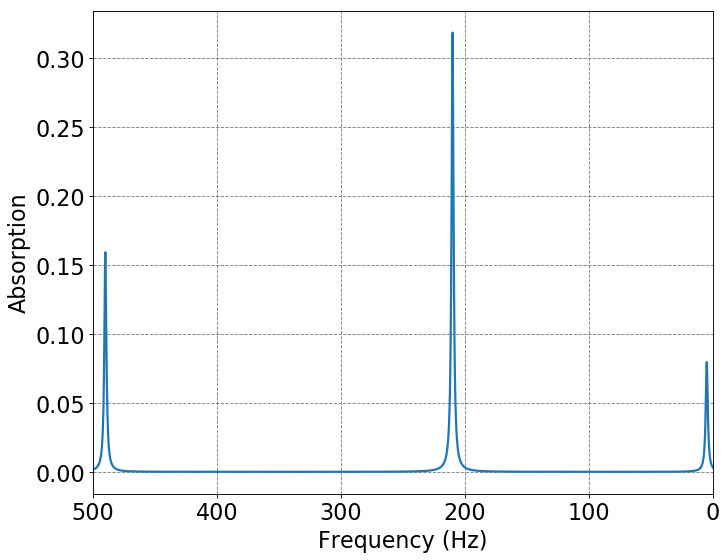

In [5]:
# First, plot the frequency domain
ax = define_figure(xlabel="Frequency (Hz)",ylabel="Absorption")
def lorentzian(x,x0,fwhm):
    return (2*np.pi)**(-1) * fwhm / ( (x-x0)**2 + (0.5*fwhm)**2 )

x = np.arange(0,500,0.01)
fwhm = 2.0
x0 = 200.0

plt.plot(x,0.25*lorentzian(x,5,fwhm)+lorentzian(x,210,fwhm)+0.5*lorentzian(x,490,fwhm),lw=2)
plt.xlim(500,0)

In [3]:
# Now convert to ppm chemical shift


### Spin-Spin Coupling

Spin-spin coupling refers to the interactions between neighboring hydrogen atoms within a molecule. Because hydrogen nuclei act as magnets, hydrogen nuclei experience the magnetic field induced by the magnetic dipole moment of other neighboring hydrogens. In an NMR spectrum, this phenomenon causes the splitting of signals into multiplets.

The Hamiltonian presented above for an isolated proton does not take into account shielding or spin-spin coupling. Let's consider what the Hamiltonian looks like for a molecule with 2 hydrogens that are not chemically equivalent.

$$\hat{H} = -\gamma B_o\left(1-\sigma_1\right)\hat{I}_{z1} - \gamma B_o\left(1-\sigma_2\right) \hat{I}_{z2}+ \frac{hJ_{12}}{\hbar^2}\hat{I}_{1}\hat{I}_{2}$$

The first two terms of the Hamiltonian account for the shielding experienced by these hydrogens, while the third term considers spin-spin coupling. $J_{12}$ is referred to as the coupling constant.

***Problem: Taking shielding and spin-spin coupling into consideration, write the Hamiltonian for a molecule with 3 hydrogens that are not chemically equivalent.***